In [104]:
import pandas as pd
import os
import seaborn as sns
import plotnine as pn
import matplotlib.pyplot as plt

In [160]:
data_dir = "intermediate_data/temp"
# print(os.path.exists(data_dir + "/" + "enrichments_temp.csv"))
enrichments = pd.read_csv(data_dir + "/" + "enrichments_temp.csv", index_col=0)
spot_info = pd.read_csv(data_dir + "/" + "spot_info_temp.csv", index_col=0)
# predicted_enrichments = pd.read_csv(data_dir + "/" + "predicted.csv")

In [94]:
gene_sets = pd.read_csv(data_dir + "/" + "gene_sets_used.csv", index_col = 0)

In [95]:
genes_dict = {
    col.split("_")[0] + " " + col.split("_")[3] : set(gene_sets[col].to_list()) for col in gene_sets.columns
}

What is the overlap between each of these gene sets, pairwise?

In [96]:
intersection_frac = pd.DataFrame(columns=['set1', 'set2', 'overlap'])

intersections_dict = {}
for set1 in genes_dict.keys():
    for set2 in genes_dict.keys():
        intersections_dict[(set1, set2)] = len(genes_dict[set1] & genes_dict[set2]) # how large is the intersection
        intersection_frac = pd.concat([intersection_frac,
                                       pd.DataFrame(
                                           data = {'set1':set1, 'set2' : set2, 
                                                   'overlap' : len(genes_dict[set1] & genes_dict[set2])},
                                           columns=['set1', 'set2', 'overlap'],
                                           index=[0]
                                       )], axis = 0)

In [97]:
# intersection_frac['overlap'] = intersection_frac['overlap'].astype('float')
intersection_frac['Overlapping Genes'] = intersection_frac['overlap'].astype('float')

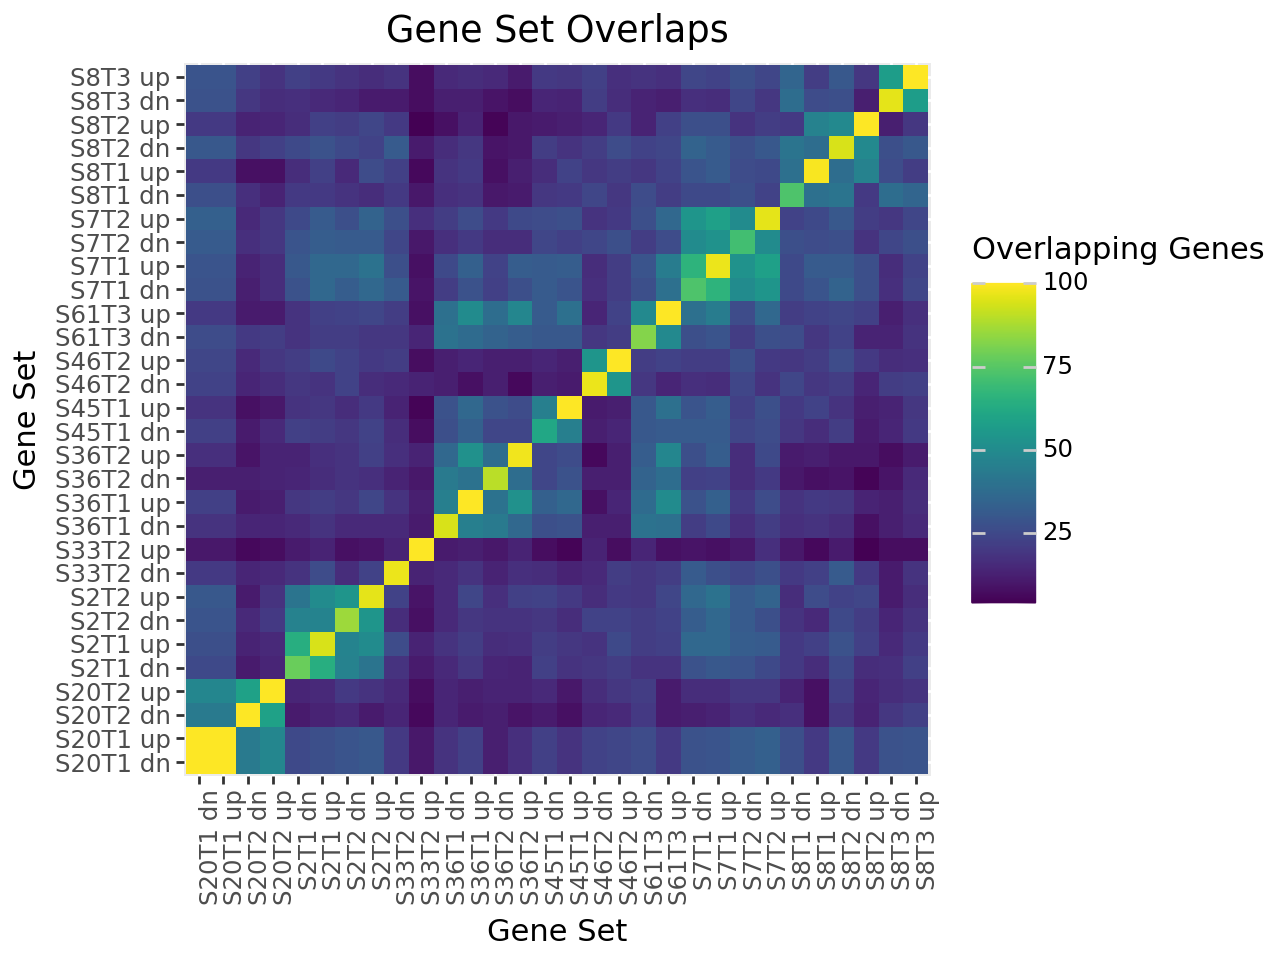

In [98]:
(pn.ggplot(intersection_frac, pn.aes(x= 'set1', y = 'set2', fill = 'Overlapping Genes')) + 
    pn.geom_tile() + 
    pn.theme(axis_text_x = pn.element_text(angle = 90, vjust = 1, hjust=0)) +
    pn.xlab("Gene Set") + 
    pn.ylab("Gene Set") + 
    pn.ggtitle("Gene Set Overlaps") #+ 
    # pn.guides(pn.guide_legend(title = "Overlapping Genes"))
    )

How correlated are these enrichments?

In [161]:
enamed = enrichments.rename(mapper = (lambda x: x.split("_")[0] + " " + x.split("_")[-1]), axis =1)
correlations = enamed.corr('pearson')
correlations = correlations.astype('float')
correlations['set1'] = list(correlations.index)


In [163]:
# correlations = correlations.astype('float')
# correlations['set1'] = correlations.index
correlations_tidy = correlations.melt(id_vars = ['set1'], 
    value_name = 'Correlation', 
    var_name = 'set2')

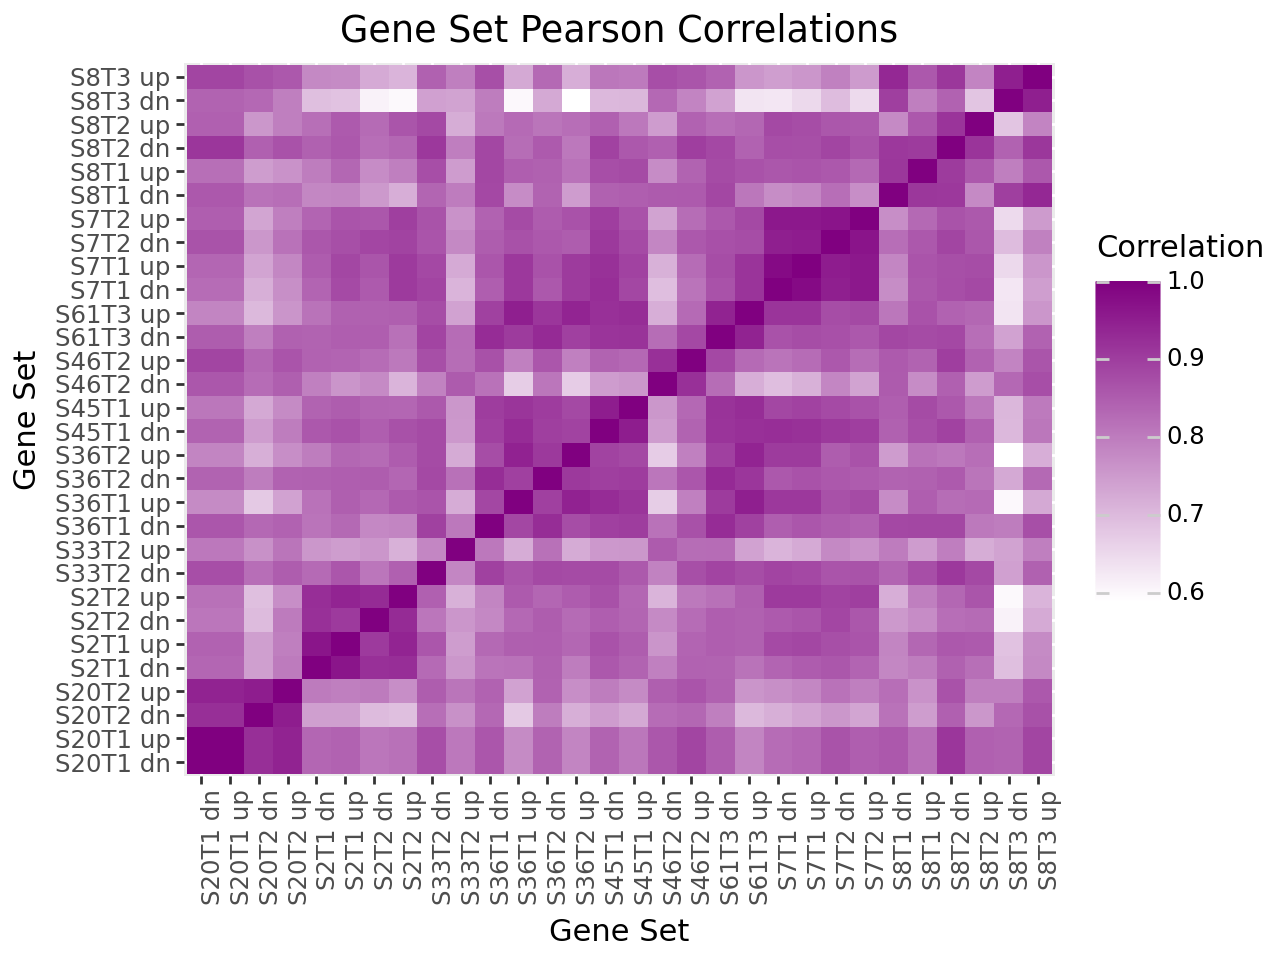

In [185]:
(pn.ggplot(correlations_tidy, pn.aes(x= 'set1', y = 'set2', fill = 'Correlation')) + 
    pn.geom_tile() + 
    pn.theme(axis_text_x = pn.element_text(angle = 90, vjust = 1, hjust=0)) +
    pn.xlab("Gene Set") + 
    pn.ylab("Gene Set") + 
    pn.ggtitle("Gene Set Pearson Correlations") + 
    # pn.scales.scale_fill_distiller()
    pn.scales.scale_fill_gradient(low = 'white', high = 'purple') + 
    pn.guides(pn.guide_legend(title = "Correlation Coefficient"))
    )

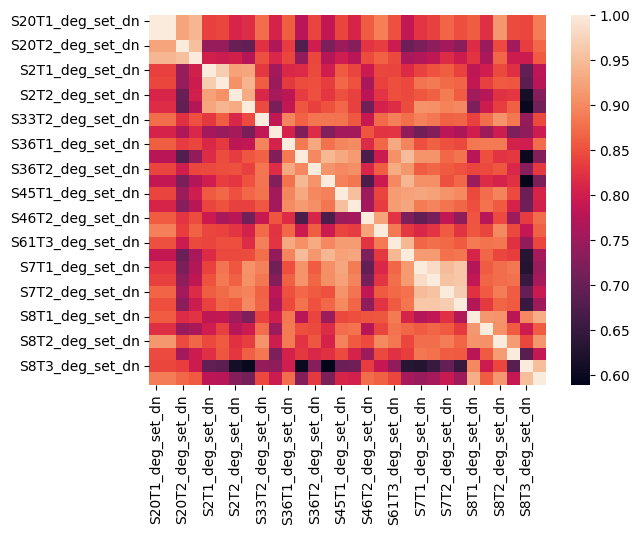

In [108]:
# sns.heatmap(correlations, )
# plt.show()